In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


df = pd.read_csv('/content/sample_data/academic_success_dataset.csv')
print(df.shape)
print(df.head())



(4424, 27)
   Marital status  Application mode  Application order  Course  \
0             1.0              17.0                5.0   171.0   
1             1.0              15.0                1.0  9254.0   
2             1.0               NaN                5.0  9070.0   
3             1.0              17.0                2.0  9773.0   
4             2.0              39.0                1.0  8014.0   

   Daytime/evening attendance\t  Previous qualification  \
0                           1.0                     1.0   
1                           1.0                     1.0   
2                           1.0                     1.0   
3                           1.0                     1.0   
4                           0.0                     1.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0          1.0                    19.0   
1                           160.0          1.0                     1.0   
2              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  4001 non-null   float64
 1   Application mode                3941 non-null   float64
 2   Application order               3998 non-null   float64
 3   Course                          3959 non-null   float64
 4   Daytime/evening attendance	     3984 non-null   float64
 5   Previous qualification          3990 non-null   float64
 6   Previous qualification (grade)  3952 non-null   float64
 7   Nacionality                     3978 non-null   float64
 8   Mother's qualification          4010 non-null   float64
 9   Father's qualification          3974 non-null   float64
 10  Mother's occupation             3988 non-null   float64
 11  Father's occupation             3999 non-null   float64
 12  Admission grade                 39

In [ ]:
data_types = df.dtypes

# Classify features into categorical or quantitative
categorical_features = data_types[data_types == 'object'].index.tolist()
quantitative_features = data_types[(data_types == 'int64') | (data_types == 'float64')].index.tolist()

print("Categorical Features:")
print(categorical_features)

print("\nQuantitative Features:")
print(quantitative_features)

Categorical Features:
['Target']

Quantitative Features:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'Unnamed: 25', 'Unnamed: 26']


 **applying heatmap  identifying important quantitative features for improved model performance**.

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


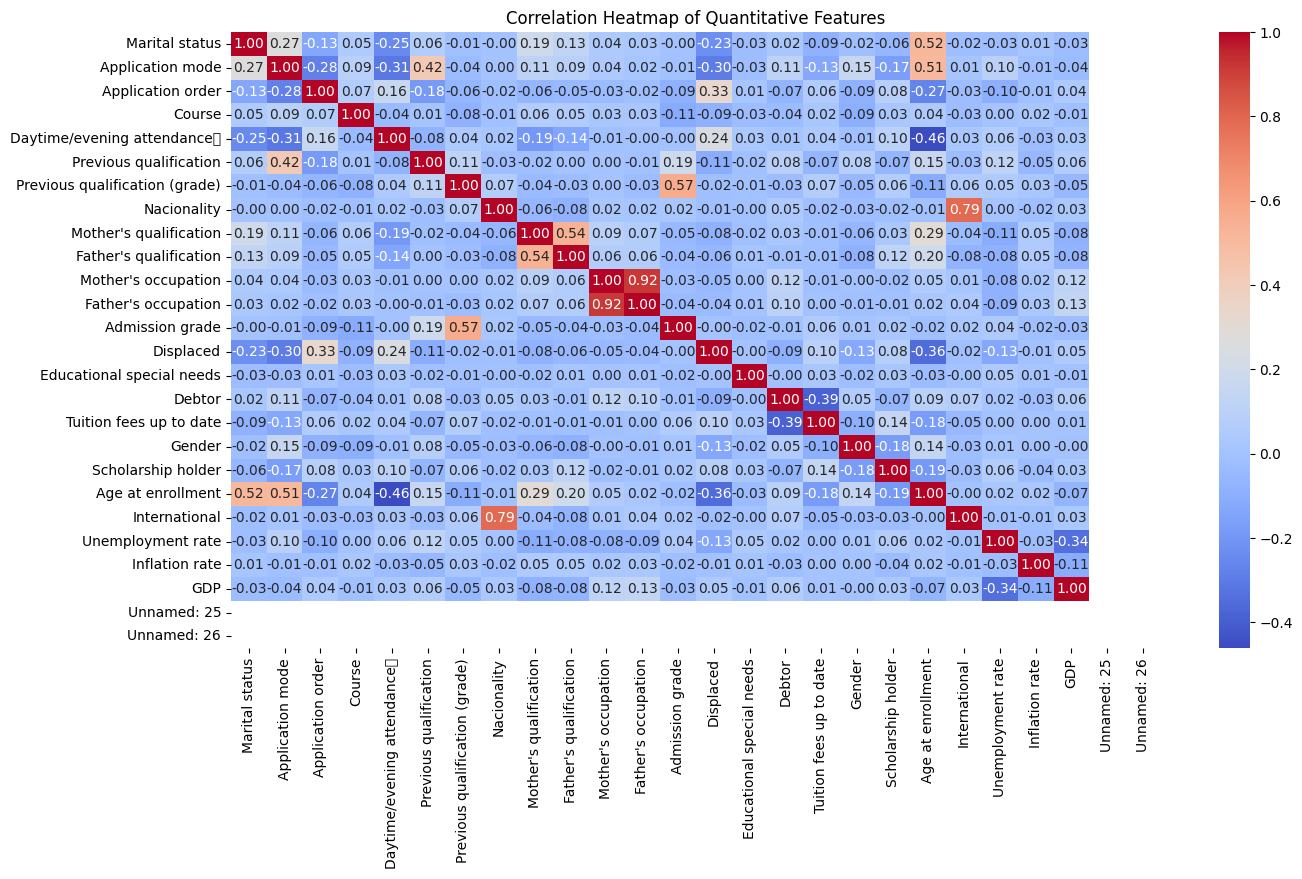

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert categorical features to numerical using encoding if needed (optional)
# df_encoded = pd.get_dummies(df)  # if you want to include all features

# Use only quantitative features for correlation
quantitative_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = quantitative_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Quantitative Features')
plt.show()


There are 26 numerical features: 

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'Unnamed: 25', 'Unnamed: 26']


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


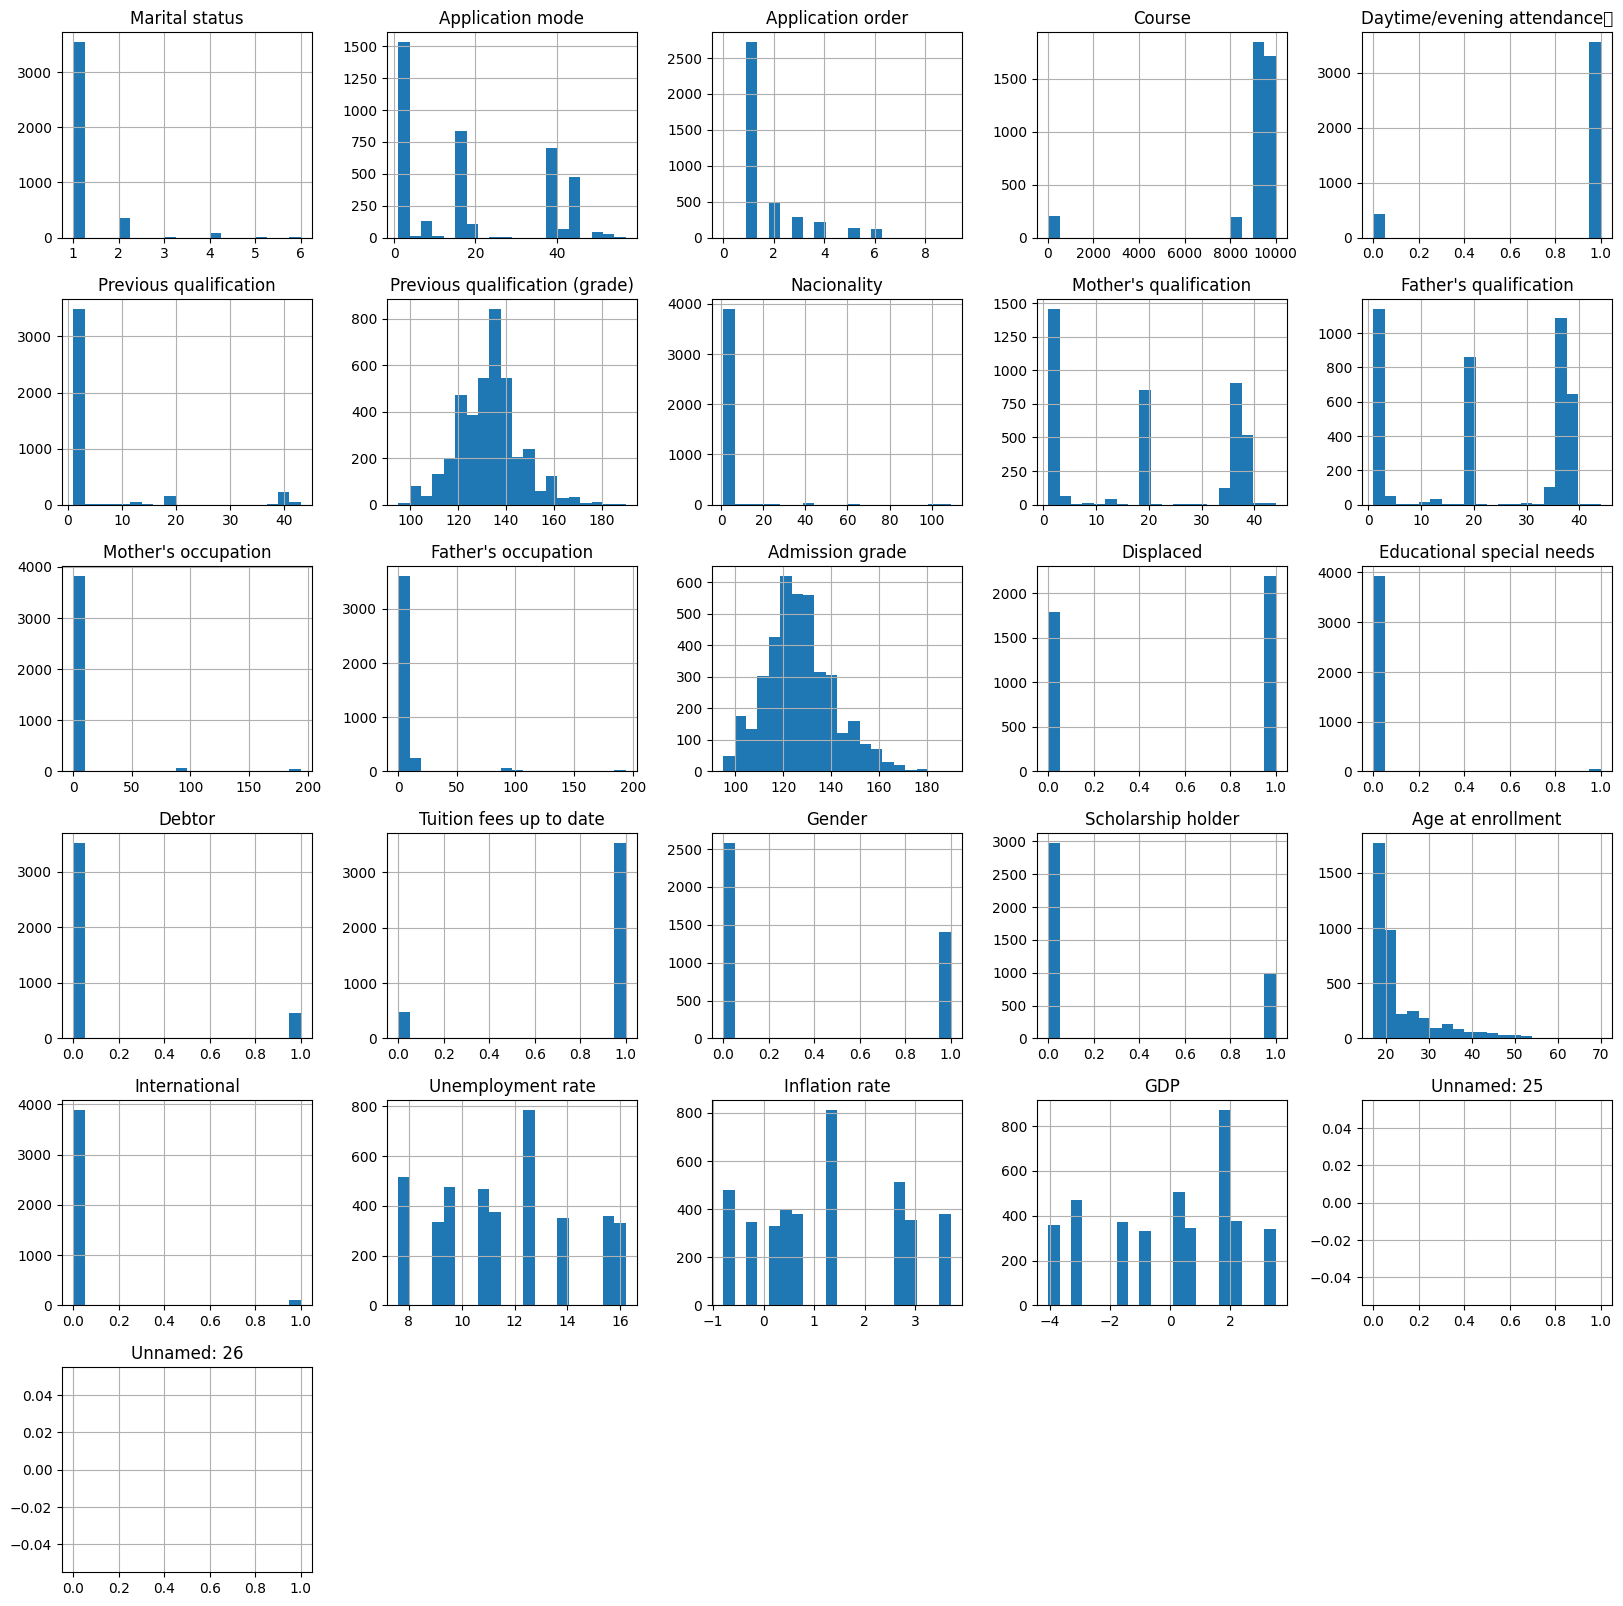

In [ ]:

##Selecting numerical features
numerical_data = df.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)
# Transposed stats for numerical features

numerical_data.describe().T

numerical_data.var()
numerical_data.skew()

numerical_data.hist(figsize=(20,20),bins=20)
plt.show()

Target
Graduate    1979
Dropout     1273
Enrolled     719
Name: count, dtype: int64


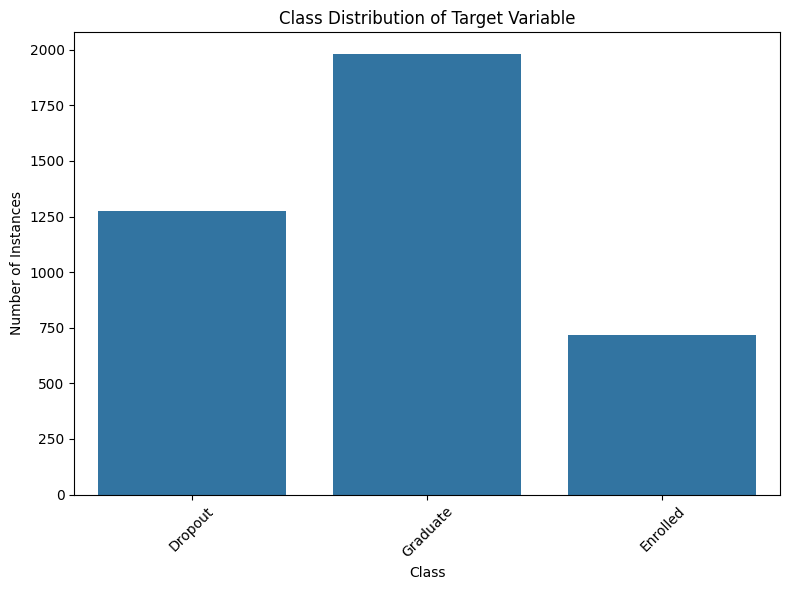

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



target_column = 'Target'

# Plot distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.tight_layout()
print(df[target_column].value_counts())
plt.show()


In [ ]:
# Step 1: Drop columns with more than 50% missing values
threshold = len(df) * 0.5
missing_cols = df.columns[df.isnull().sum() > threshold]
print("📉 Dropping columns with >50% missing values:")
print(missing_cols.tolist())

df = df.dropna(axis=1, thresh=threshold)

# Step 2: Drop 'Unnamed' garbage columns that may have no NaNs
unnamed_cols = df.columns[df.columns.str.contains('^Unnamed')]
print("🗑 Dropping 'Unnamed' columns:")
print(unnamed_cols.tolist())

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Final column list
print("✅ Final columns:")
print(df.columns.tolist())


📉 Dropping columns with >50% missing values:
['Unnamed: 25', 'Unnamed: 26']
🗑 Dropping 'Unnamed' columns:
[]
✅ Final columns:
['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


** Categorical values**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Load dataset
df.columns = df.columns.str.strip()  # Clean up column names

# Identify columns
categorical_cols = df.select_dtypes(include='object').columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Impute categorical columns (most frequent) if there are values
cat_imputer = SimpleImputer(strategy='most_frequent')
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = cat_imputer.fit_transform(df[[col]]).ravel()


# Impute numeric columns with mean ()
num_imputer = SimpleImputer(strategy='mean')
for col in numeric_cols:
    if df[col].isnull().sum() > 0 and df[col].notnull().sum() > 0:
        df[col] = num_imputer.fit_transform(df[[col]]).ravel()



print(df.isnull().sum())


Marital status                    0
Application mode                  0
Application order                 0
Course                            0
Daytime/evening attendance        0
Previous qualification            0
Previous qualification (grade)    0
Nacionality                       0
Mother's qualification            0
Father's qualification            0
Mother's occupation               0
Father's occupation               0
Admission grade                   0
Displaced                         0
Educational special needs         0
Debtor                            0
Tuition fees up to date           0
Gender                            0
Scholarship holder                0
Age at enrollment                 0
International                     0
Unemployment rate                 0
Inflation rate                    0
GDP                               0
Target                            0
dtype: int64


In [ ]:
# Count and display duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

duplicate_rows = df[df.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

# Drop duplicates
df = df.drop_duplicates()


Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [Marital status, Application mode, Application order, Course, Daytime/evening attendance, Previous qualification, Previous qualification (grade), Nacionality, Mother's qualification, Father's qualification, Mother's occupation, Father's occupation, Admission grade, Displaced, Educational special needs, Debtor, Tuition fees up to date, Gender, Scholarship holder, Age at enrollment, International, Unemployment rate, Inflation rate, GDP, Target]
Index: []

[0 rows x 25 columns]


In [ ]:
# import pandas as pd

# def remove_outliers_iqr(df, columns):
#     """Removes outliers from the given DataFrame using the IQR method."""
#     for col in columns:
#         if df[col].dtype in ['int64', 'float64']:
#             Q1 = df[col].quantile(0.25)
#             Q3 = df[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR

#             # Count and show number of outliersc
#             outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
#             print(f"{col}: {outliers.shape[0]} outliers removed.")

#             # Filter out the outliers
#             df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
#     return df

# # Select only numerical columns for outlier removal
# numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# # Apply the function
# df = remove_outliers_iqr(df, numeric_cols)

# # Final shape
# print("✅ Data shape after outlier removal:", df.shape)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# # Create a copy of your cleaned dataset
df_scaled = df.copy()

# Identify numeric columns (excluding the target)
numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'Target']

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMax scaling to each numeric column (individually for display clarity)
for col in numerical_cols:
    df_scaled[col] = scaler.fit_transform(df_scaled[[col]])

# Show the first few rows of the scaled dataset
df_scaled.head()
# Stanrdization
# from sklearn.preprocessing import StandardScaler
# import pandas as pd

# # Create a copy of your dataset
# df_scaled = df.copy()

# # Identify numeric columns (excluding the target column)
# numerical_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns
# numerical_cols = [col for col in numerical_cols if col != 'Target']

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the numeric columns
# df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

# # Display the first few rows of the scaled dataset
# df_scaled.head()
#normalization
# from sklearn.preprocessing import Normalizer
# import pandas as pd

# # Create a copy of the dataset
# df_normalized = df.copy()

# # Identify numeric columns (excluding the target column)
# numerical_cols = df_normalized.select_dtypes(include=['int64', 'float64']).columns
# numerical_cols = [col for col in numerical_cols if col != 'Target']

# # Initialize the Normalizer
# normalizer = Normalizer()

# # Apply normalization only to the numeric feature columns
# normalized_data = normalizer.fit_transform(df_normalized[numerical_cols])

# # Replace normalized columns in the dataframe
# df_normalized[numerical_cols] = normalized_data

# # Display the first few rows
# print(df_normalized.head())



,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,0.255814,...,0.0,1.0,1.000000,0.000000,0.117503,0.0,0.372093,0.488889,0.766182,Dropout
1,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,0.046512,...,0.0,0.0,1.000000,0.000000,0.037736,0.0,0.732558,0.111111,0.640687,Graduate
2,0.0,0.313608,0.555556,0.907512,1.0,0.0,0.284211,0.007972,0.837209,0.837209,...,0.0,0.0,1.000000,0.251132,0.037736,0.0,0.372093,0.488889,0.766182,Dropout
3,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,0.837209,...,0.0,1.0,0.352646,0.000000,0.056604,0.0,0.209302,0.000000,0.124174,Graduate
4,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,0.493095,...,0.0,1.0,0.000000,0.000000,0.117503,0.0,0.732558,0.111111,0.640687,Graduate


In [ ]:
# Step 1: Label Encode categorical columns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1.0,17.00000,5.0,171.0,1.0,1.0,122.0,1.000000,19.0,12.00000,...,0.0,1.0,1.000000,0.000000,23.227638,0.0,10.8,1.4,1.74,0
1,1.0,15.00000,1.0,9254.0,1.0,1.0,160.0,1.000000,1.0,3.00000,...,0.0,0.0,1.000000,0.000000,19.000000,0.0,13.9,-0.3,0.79,2
2,1.0,18.56204,5.0,9070.0,1.0,1.0,122.0,1.860985,37.0,37.00000,...,0.0,0.0,1.000000,0.251132,19.000000,0.0,10.8,1.4,1.74,0
3,1.0,17.00000,2.0,9773.0,1.0,1.0,122.0,1.000000,38.0,37.00000,...,0.0,1.0,0.352646,0.000000,20.000000,0.0,9.4,-0.8,-3.12,2
4,2.0,39.00000,1.0,8014.0,0.0,1.0,100.0,1.000000,37.0,22.20307,...,0.0,1.0,0.000000,0.000000,23.227638,0.0,13.9,-0.3,0.79,2


In [ ]:
# Get correlation of each feature with the target
target_corr = df_encoded.corr()['Target'].drop('Target').sort_values()

# Display weakly correlated features
print("🔻 Weak correlations with target (|corr| < 0.05):")
print(target_corr[abs(target_corr) < 0.05])


🔻 Weak correlations with target (|corr| < 0.05):
Inflation rate              -0.016985
Educational special needs   -0.015427
Nacionality                 -0.014015
Father's qualification      -0.005982
Mother's occupation          0.001235
International                0.001885
Father's occupation          0.004512
Unemployment rate            0.012768
Course                       0.023839
GDP                          0.034430
Name: Target, dtype: float64


In [ ]:
# Drop the weak features
weak_features = ['Inflation rate', 'Application order', 'Course',
                 "Father's qualification", "Mother's qualification"]

df_encoded.drop(columns=weak_features, inplace=True)
print("✅ Dropped weak features based on low target correlation.")


✅ Dropped weak features based on low target correlation.


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']

# Step 2: Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Step 3: Confirm shapes
print("✅ Dataset split completed.")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


✅ Dataset split completed.
X_train: (3096, 19)
X_test : (1328, 19)
y_train: (3096,)
y_test : (1328,)


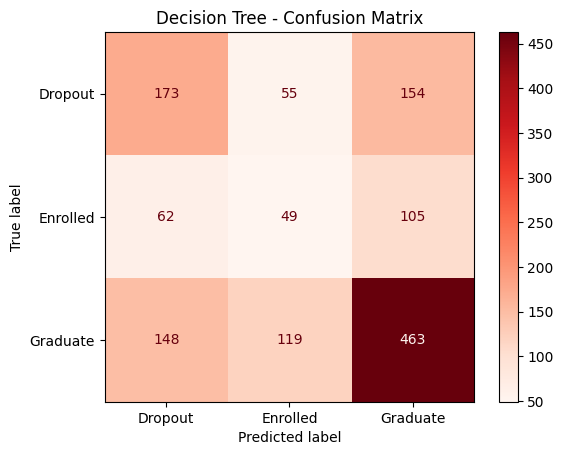

📄 Decision Tree - Classification Report:

              precision    recall  f1-score   support

     Dropout       0.45      0.45      0.45       382
    Enrolled       0.22      0.23      0.22       216
    Graduate       0.64      0.63      0.64       730

    accuracy                           0.52      1328
   macro avg       0.44      0.44      0.44      1328
weighted avg       0.52      0.52      0.52      1328



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# ✅ Train the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 🔍 Make predictions
y_pred = dt_classifier.predict(X_test)

# 📊 Confusion Matrix with dynamic label handling
cm = confusion_matrix(y_test, y_pred)

# Get the unique class indices and their corresponding names
class_names = ['Dropout', 'Enrolled', 'Graduate']
labels_present = unique_labels(y_test, y_pred)
display_labels = [class_names[i] for i in labels_present]

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Reds')
plt.title("Decision Tree - Confusion Matrix")
plt.show()

# 📝 Classification Report
report = classification_report(y_test, y_pred, target_names=display_labels)
print("📄 Decision Tree - Classification Report:\n")
print(report)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


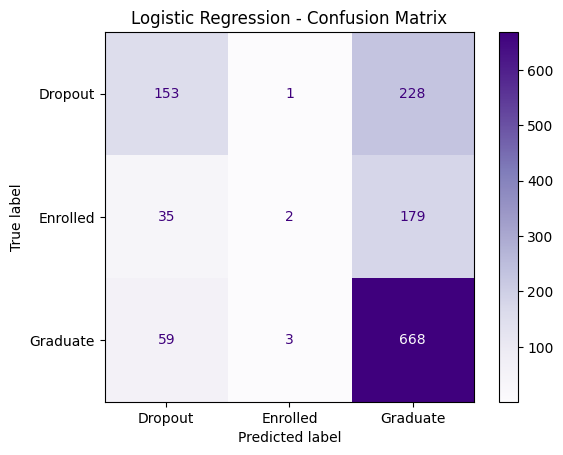

📄 Logistic Regression - Classification Report:

              precision    recall  f1-score   support

     Dropout       0.62      0.40      0.49       382
    Enrolled       0.33      0.01      0.02       216
    Graduate       0.62      0.92      0.74       730

    accuracy                           0.62      1328
   macro avg       0.52      0.44      0.41      1328
weighted avg       0.57      0.62      0.55      1328



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# ✅ Ensure target values are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# ✅ Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# 🔍 Make predictions
y_pred_log = log_reg.predict(X_test)

# 📊 Confusion Matrix with dynamic label handling
cm = confusion_matrix(y_test, y_pred_log)

class_names = ['Dropout', 'Enrolled', 'Graduate']
labels_present = unique_labels(y_test, y_pred_log)
display_labels = [class_names[i] for i in labels_present]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Purples')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# 📝 Classification Report
report = classification_report(y_test, y_pred_log, target_names=display_labels)
print("📄 Logistic Regression - Classification Report:\n")
print(report)


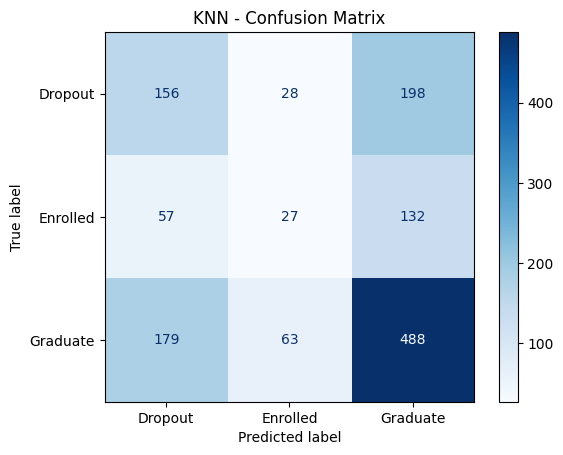

📄 KNN - Classification Report:

              precision    recall  f1-score   support

     Dropout       0.40      0.41      0.40       382
    Enrolled       0.23      0.12      0.16       216
    Graduate       0.60      0.67      0.63       730

    accuracy                           0.51      1328
   macro avg       0.41      0.40      0.40      1328
weighted avg       0.48      0.51      0.49      1328



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt

# ✅ Ensure target values are integers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# ✅ Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 🔍 Make predictions
y_pred = knn.predict(X_test)

# 📊 Confusion Matrix with dynamic label display
cm = confusion_matrix(y_test, y_pred)

# Dynamically fetch only the labels that are present
class_names = ['Dropout', 'Enrolled', 'Graduate']
labels_present = unique_labels(y_test, y_pred)
display_labels = [class_names[i] for i in labels_present]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()

# 📝 Classification Report
report = classification_report(y_test, y_pred, target_names=display_labels)
print("📄 KNN - Classification Report:\n")
print(report)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


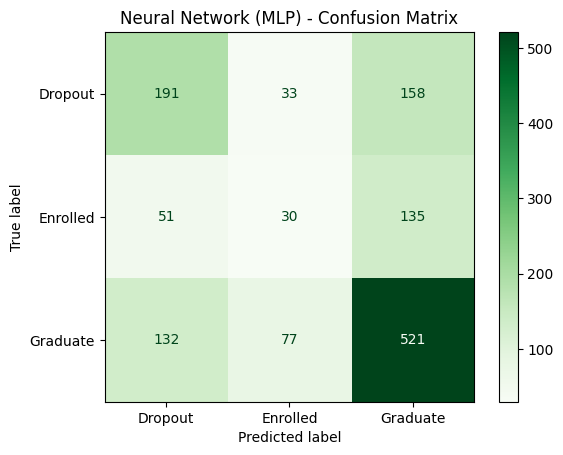

📄 Neural Network (MLP) - Classification Report:

              precision    recall  f1-score   support

     Dropout       0.51      0.50      0.51       382
    Enrolled       0.21      0.14      0.17       216
    Graduate       0.64      0.71      0.67       730

    accuracy                           0.56      1328
   macro avg       0.46      0.45      0.45      1328
weighted avg       0.53      0.56      0.54      1328



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils.multiclass import unique_labels


import matplotlib.pyplot as plt

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the MLP classifier on scaled data
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test_scaled)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
class_names = ['Dropout', 'Enrolled', 'Graduate']
labels_present = unique_labels(y_test, y_pred_mlp)
display_labels = [class_names[i] for i in labels_present]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap='Greens')
plt.title("Neural Network (MLP) - Confusion Matrix")
plt.show()

# Classification report
report = classification_report(y_test, y_pred_mlp, target_names=display_labels)
print("📄 Neural Network (MLP) - Classification Report:\n")
print(report)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


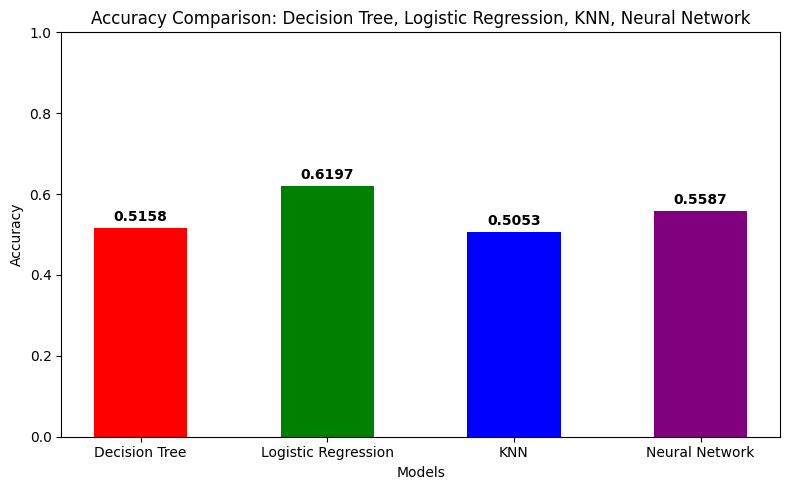

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 🔄 Scale data (important for MLP)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🚀 Train MLP on scaled data
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# ✅ Step 1: Collect predictions
y_pred_dt = dt_classifier.predict(X_test)
y_pred_log = log_reg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_mlp = mlp.predict(X_test_scaled)  # ✅ Use scaled test data

# 📦 Step 2: Accuracy list
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_mlp)
]

# 🏷️ Step 3: Model labels
models = ['Decision Tree', 'Logistic Regression', 'KNN', 'Neural Network']

# 📈 Step 4: Plot accuracy comparison
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracies, color=['red', 'green', 'blue', 'purple'], width=0.5)

# ✍️ Add values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4),
             ha='center', va='bottom', fontweight='bold')

plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Decision Tree, Logistic Regression, KNN, Neural Network")
plt.tight_layout()
plt.show()


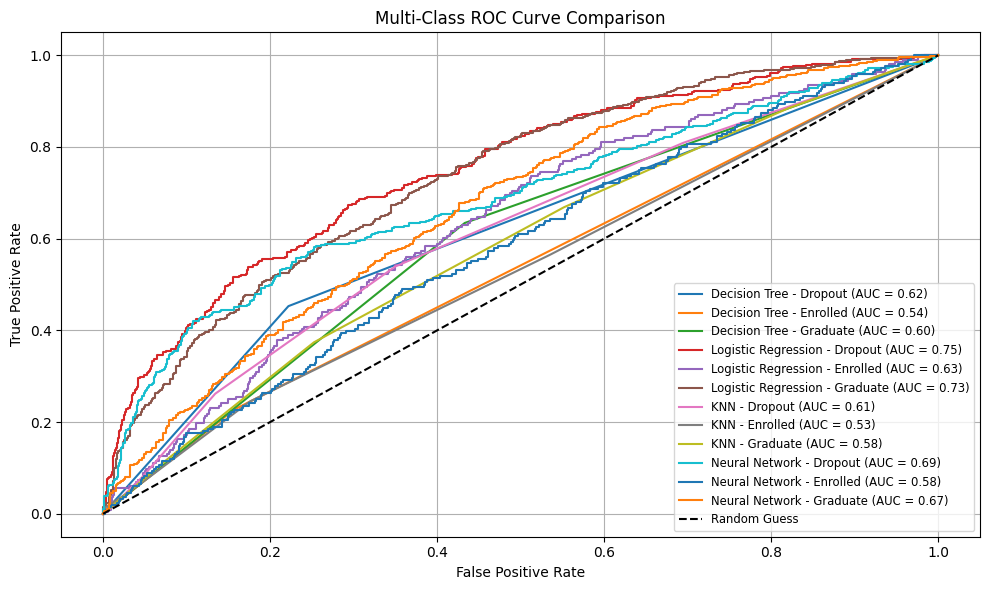

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Define model dictionary again with names
models = {
    'Decision Tree': dt_classifier,
    'Logistic Regression': log_reg,
    'KNN': knn,
    'Neural Network': mlp  # MLP needs scaled input
}

# Select test data for each model
X_test_inputs = {
    'Decision Tree': X_test,
    'Logistic Regression': X_test,
    'KNN': X_test,
    'Neural Network': X_test_scaled
}

# Plot ROC for each class for each model
plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    if not hasattr(model, 'predict_proba'):
        continue  # Skip models without probability prediction

    # Use correct input
    X_input = X_test_inputs[model_name]
    y_score = model.predict_proba(X_input)

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} - {["Dropout", "Enrolled", "Graduate"][i]} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve Comparison")
plt.legend(loc="lower right", fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()


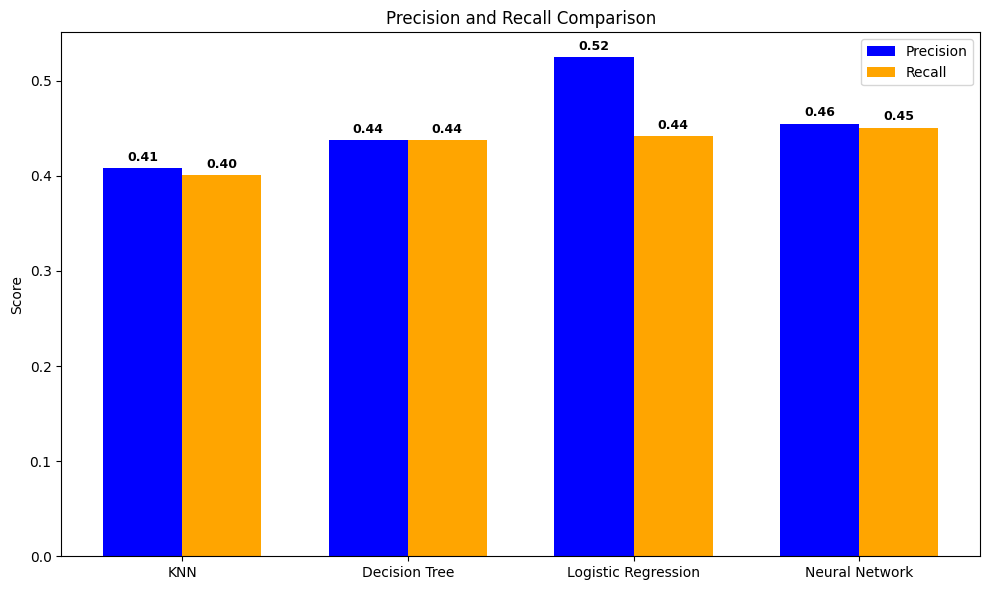

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming y_test and all predictions are already available
# And classification reports are generated like this:
# report_knn, report_dt, report_log, report_mlp = classification_report(..., output_dict=True)


report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)


# Step 1: Extract macro average precision and recall
knn_precision = report_knn["macro avg"]["precision"]
knn_recall = report_knn["macro avg"]["recall"]

dt_precision = report_dt["macro avg"]["precision"]
dt_recall = report_dt["macro avg"]["recall"]

lr_precision = report_log["macro avg"]["precision"]
lr_recall = report_log["macro avg"]["recall"]

mlp_precision = report_mlp["macro avg"]["precision"]
mlp_recall = report_mlp["macro avg"]["recall"]

# Step 2: Create lists for plotting
model_names = ['KNN', 'Decision Tree', 'Logistic Regression', 'Neural Network']
precisions = [knn_precision, dt_precision, lr_precision, mlp_precision]
recalls = [knn_recall, dt_recall, lr_recall, mlp_recall]

# Step 3: Plot bar chart
x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, precisions, width, label='Precision', color='blue')
rects2 = ax.bar(x + width/2, recalls, width, label='Recall', color='orange')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('Precision and Recall Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Display values on bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold')

fig.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def recommend_min_max_scaling(df, threshold_low=0.0, threshold_high=1.0):
    recommendations = []

    for col in df.select_dtypes(include=[np.number]).columns:
        col_min = df[col].min()
        col_max = df[col].max()

        # Check if the column is already in [0, 1]
        if not (threshold_low <= col_min and col_max <= threshold_high):
            recommendations.append({
                'column': col,
                'min': col_min,
                'max': col_max,
                'needs_scaling': True
            })
        else:
            recommendations.append({
                'column': col,
                'min': col_min,
                'max': col_max,
                'needs_scaling': False
            })

    return pd.DataFrame(recommendations)

# Example usage
df = pd.read_csv('/content/sample_data/academic_success_dataset.csv')
scaling_recommendations = recommend_min_max_scaling(df)
print(scaling_recommendations)


                            column    min      max  needs_scaling
0                   Marital status   1.00     6.00           True
1                 Application mode   1.00    57.00           True
2                Application order   0.00     9.00           True
3                           Course  33.00  9991.00           True
4     Daytime/evening attendance\t   0.00     1.00          False
5           Previous qualification   1.00    43.00           True
6   Previous qualification (grade)  95.00   190.00           True
7                      Nacionality   1.00   109.00           True
8           Mother's qualification   1.00    44.00           True
9           Father's qualification   1.00    44.00           True
10             Mother's occupation   0.00   194.00           True
11             Father's occupation   0.00   194.00           True
12                 Admission grade  95.00   190.00           True
13                       Displaced   0.00     1.00          False
14       E